In [1]:
import pandas as pd
import seaborn as sns
imdb = pd.read_csv('imdb.csv')
mojo = pd.read_csv('mojo_movies.csv')

In [2]:
imdb = imdb.drop('Unnamed: 0', axis=1)
mojo = mojo.drop('Unnamed: 0', axis=1)

In [3]:
imdb.head()

,Title,Year,Genre,IMDB_Score,Metascore,Votes,US_Gross
0,Star Wars: Episode VII - The Force Awakens,2015,"Action, Adventure, Fantasy",8.0,81,775918,936662225
1,Avatar,2009,"Action, Adventure, Fantasy",7.8,83,1032375,936662225
2,Black Panther,2018,"Action, Adventure, Sci-Fi",7.3,88,484618,936662225
3,Avengers: Infinity War,2018,"Action, Adventure, Sci-Fi",8.5,68,609291,936662225
4,Jurassic World,2015,"Action, Adventure, Sci-Fi",7.0,59,532709,936662225


In [4]:
imdb['Genre'].str.contains('Action').sum()

367

In [5]:
imdb['Genre'].str.contains('Adventure').sum()

348

In [6]:
imdb['Genre'].str.contains('Action, Adventure').sum()

201

In [7]:
imdb['Genre'].str.contains('Fantasy').sum()

106

In [8]:
imdb['Genre'].str.contains('Sci-Fi').sum()

106

In [9]:
imdb['Genre'].str.contains('Fantasy' or 'Sci-Fi').sum()

106

In [10]:
mojo[mojo['Title'].str.contains('Star Wars')]

,Rank,Title,Studio_Abbreviation,Worldwide_Gross,Domestic_Gross,Domestic_Share,Overseas_Gross,Overseas_Share,Year
22,23,Solo: A Star Wars Story,BV,$392.9,$213.8,54.4%,$179.2,45.6%,2018
302,1,Star Wars: The Last Jedi,BV,"$1,332.5",$620.2,46.5%,$712.4,53.5%,2017
622,2,Rogue One: A Star Wars Story,BV,"$1,056.1",$532.2,50.4%,$523.9,49.6%,2016
1054,1,Star Wars: The Force Awakens,BV,"$2,068.2",$936.7,45.3%,"$1,131.6",54.7%,2015
2312,67,Star Wars: Episode I - The Phantom Menace (in 3D),Fox,$102.7,$43.5,42.3%,$59.3,57.7%,2012


In [11]:
imdb[imdb['Title'].str.contains('Star Wars')]

,Title,Year,Genre,IMDB_Score,Metascore,Votes,US_Gross
0,Star Wars: Episode VII - The Force Awakens,2015,"Action, Adventure, Fantasy",8.0,81,775918,936662225
6,Star Wars: Episode VIII - The Last Jedi,2017,"Action, Adventure, Fantasy",7.2,85,450825,936662225
99,Solo: A Star Wars Story,2018,"Action, Adventure, Fantasy",7.0,62,213274,936662225


In [12]:
# updating star wars movie titles to be same for both datasets
imdb.at[8, 'Title'] = 'Rogue One: A Star Wars Story'

In [13]:
imdb.at[0, 'Title'] = 'Star Wars: The Force Awakens'
imdb.at[6, 'Title'] = 'Star Wars: The Last Jedi'
mojo.at[2312, 'Title'] = 'Star Wars: The Phantom Menace (in 3D)'

In [14]:
imdb[imdb['Title'].str.contains('Solo')]

,Title,Year,Genre,IMDB_Score,Metascore,Votes,US_Gross
99,Solo: A Star Wars Story,2018,"Action, Adventure, Fantasy",7.0,62,213274,936662225
867,The Soloist,2009,"Biography, Drama, Music",6.7,61,48481,936662225


In [15]:
# filling missing metascore values
imdb.at[822, 'Metascore'] = '31'

In [16]:
imdb.at[878, 'Metascore'] = '73'

In [17]:
imdb.at[816, 'Metascore'] = None
type(imdb.at[816, 'Metascore'])

NoneType

In [18]:
imdb['Metascore'].fillna(imdb['Metascore'].median(), inplace=True)


In [19]:
imdb[imdb['Title'].str.contains('Furious')]

,Title,Year,Genre,IMDB_Score,Metascore,Votes,US_Gross
30,Furious 7,2015,"Action, Crime, Thriller",7.2,67,332098,936662225
77,Furious 6,2013,"Action, Crime, Thriller",7.1,61,344006,936662225
88,The Fate of the Furious,2017,"Action, Crime, Thriller",6.7,56,176105,936662225
174,Fast & Furious,2009,"Action, Crime, Thriller",6.6,46,240014,936662225


In [20]:
mojo[mojo['Title'].str.contains('Furious')]

,Rank,Title,Studio_Abbreviation,Worldwide_Gross,Domestic_Gross,Domestic_Share,Overseas_Gross,Overseas_Share,Year
295,296,Furious (Legend of Kolovrat),CARUSEL,$10.0k,$10.0k,100.0%,NaN,0.0%,2018
304,3,The Fate of the Furious,Uni.,"$1,236.0",$226.0,18.3%,"$1,010.0",81.7%,2017
1056,3,Furious 7,Uni.,"$1,516.0",$353.0,23.3%,"$1,163.0",76.7%,2015
1903,6,Fast & Furious 6,Uni.,$788.7,$238.7,30.3%,$550.0,69.7%,2013
3388,17,Fast and Furious,Uni.,$363.2,$155.1,42.7%,$208.1,57.3%,2009


In [21]:
#replacing all occurences of 'and' with '&'
mojo['Title'] = mojo['Title'].str.replace('and', '&')

In [22]:
imdb['Title'] = imdb['Title'].str.replace('and', '&')

In [23]:
mojo[mojo['Title'].str.contains('and')]

,Rank,Title,Studio_Abbreviation,Worldwide_Gross,Domestic_Gross,Domestic_Share,Overseas_Gross,Overseas_Share,Year


In [24]:
imdb[imdb['Title'].str.contains('and')]

,Title,Year,Genre,IMDB_Score,Metascore,Votes,US_Gross


In [25]:
# joining dataframes
movie_merge = mojo.merge(imdb, on=['Title'], how='inner')

In [26]:
movie_merge.head()

,Rank,Title,Studio_Abbreviation,Worldwide_Gross,Domestic_Gross,Domestic_Share,Overseas_Gross,Overseas_Share,Year_x,Year_y,Genre,IMDB_Score,Metascore,Votes,US_Gross
0,1,Avengers: Infinity War,BV,"$2,048.4",$678.8,33.1%,"$1,369.5",66.9%,2018,2018,"Action, Adventure, Sci-Fi",8.5,68,609291,936662225
1,2,Black Panther,BV,"$1,346.9",$700.1,52.0%,$646.9,48.0%,2018,2018,"Action, Adventure, Sci-Fi",7.3,88,484618,936662225
2,3,Jurassic World: Fallen Kingdom,Uni.,"$1,309.5",$417.7,31.9%,$891.8,68.1%,2018,2018,"Action, Adventure, Sci-Fi",6.2,51,206471,936662225
3,4,Incredibles 2,BV,"$1,242.8",$608.6,49.0%,$634.2,51.0%,2018,2018,"Animation, Action, Adventure",7.7,80,189268,936662225
4,5,Aquaman,WB,"$1,146.9",$334.8,29.2%,$812.1,70.8%,2018,2018,"Action, Adventure, Fantasy",7.2,55,210821,936662225


In [27]:
# changing numeric string values to floats and ints
movie_merge['Metascore'] = movie_merge['Metascore'].apply(int)

In [28]:
movie_merge['Worldwide_Gross'] = movie_merge['Worldwide_Gross'].str.strip('$k').str.replace(',', '').apply(float)

In [29]:
movie_merge['Domestic_Gross'] = movie_merge['Domestic_Gross'].str.strip('$k').str.replace(',', '').apply(float)

In [30]:
movie_merge['Overseas_Gross'] = movie_merge['Overseas_Gross'].str.strip('$k').str.replace(',', '').apply(float)

In [31]:
movie_merge['Domestic_Share'] = movie_merge['Domestic_Share'].str.strip('%').apply(float)

In [32]:
movie_merge['Overseas_Share'] = movie_merge['Overseas_Share'].str.strip('%').apply(float)

In [33]:
# dropping useless columns
movie_merge = movie_merge.drop('US_Gross', axis=1)
movie_merge = movie_merge.drop(['Rank'], axis=1)
movie_merge = movie_merge.drop(['Year_y'], axis=1)

In [35]:
# data cleaned and formatted!!!
movie_merge.describe()
movie_merge.to_csv('movie_merge.csv')

In [36]:
# examining missing values from overseas gross. suspect these were only released domestically
movie_merge[movie_merge['Overseas_Gross'].isnull()]

,Title,Studio_Abbreviation,Worldwide_Gross,Domestic_Gross,Domestic_Share,Overseas_Gross,Overseas_Share,Year_x,Genre,IMDB_Score,Metascore,Votes
60,Book Club,Par.,68.6,68.6,100.0,NaN,0.0,2018,"Comedy, Drama, Romance",6.1,53,17004
75,Winchester,LGF,25.1,25.1,100.0,NaN,0.0,2018,"Biography, Drama, Fantasy",5.4,28,23141
147,All Eyez on Me,LG/S,44.9,44.9,100.0,NaN,0.0,2017,"Biography, Drama, Music",5.8,38,18155
148,47 Meters Down,ENTMP,44.3,44.3,100.0,NaN,0.0,2017,"Adventure, Drama, Horror",5.6,52,37900
152,Wind River,Wein.,33.8,33.8,100.0,NaN,0.0,2017,"Crime, Drama, Mystery",7.7,73,164033
153,Hostiles,ENTMP,29.8,29.8,100.0,NaN,0.0,2017,"Adventure, Drama, Western",7.2,65,50533
154,Home Again,ORF,27.0,27.0,100.0,NaN,0.0,2017,"Comedy, Drama, Romance",5.8,41,21970
300,War Room,TriS,67.8,67.8,100.0,NaN,0.0,2015,Drama,6.4,26,11537
400,When the Game St&s Tall,TriS,30.1,30.1,100.0,NaN,0.0,2014,"Drama, Family, Sport",6.7,41,14407
479,Snitch,LG/S,42.9,42.9,100.0,NaN,0.0,2013,"Action, Drama, Thriller",6.5,51,77444


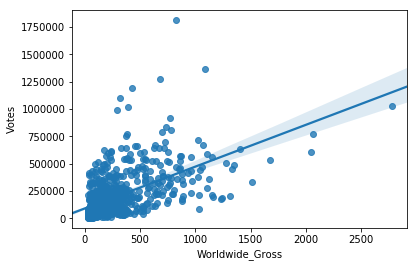

In [37]:
#comparing number of votes and box office performance
sns.regplot(x=movie_merge['Worldwide_Gross'], y=movie_merge['Votes'], scatter=True)

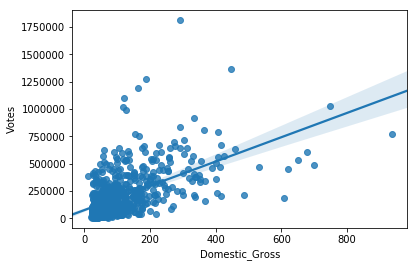

In [38]:
sns.regplot(x=movie_merge['Domestic_Gross'], y=movie_merge['Votes'], scatter=True)

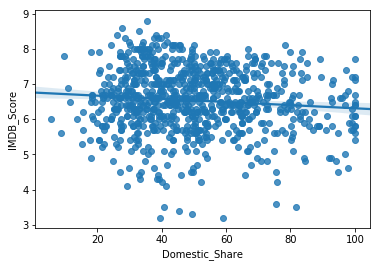

In [39]:
sns.regplot(x=movie_merge['Domestic_Share'], y=movie_merge['IMDB_Score'], scatter=True)

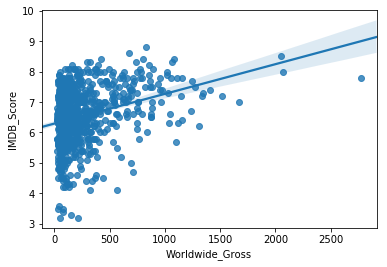

In [40]:
sns.regplot(x=movie_merge['Worldwide_Gross'], y=movie_merge['IMDB_Score'], scatter=True)

In [62]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
genres = movie_merge['Genre'].str.split(pat=',', expand=True)
movie_merge['Subgenre1'] = genres[0]
movie_merge['Subgrene2'] = genres[1]
movie_merge['Subgrene3'] = genres[2]
movie_merge.to_csv('movie_merge.csv')

In [52]:
movie_merge.head()

,Title,Studio_Abbreviation,Worldwide_Gross,Domestic_Gross,Domestic_Share,Overseas_Gross,Overseas_Share,Year_x,Genre,IMDB_Score,Metascore,Votes,Subgenre1,Subgrene2,Subgrene3
0,Avengers: Infinity War,BV,2048.4,678.8,33.1,1369.5,66.9,2018,"Action, Adventure, Sci-Fi",8.5,68,609291,Action,Adventure,Sci-Fi
1,Black Panther,BV,1346.9,700.1,52.0,646.9,48.0,2018,"Action, Adventure, Sci-Fi",7.3,88,484618,Action,Adventure,Sci-Fi
2,Jurassic World: Fallen Kingdom,Uni.,1309.5,417.7,31.9,891.8,68.1,2018,"Action, Adventure, Sci-Fi",6.2,51,206471,Action,Adventure,Sci-Fi
3,Incredibles 2,BV,1242.8,608.6,49.0,634.2,51.0,2018,"Animation, Action, Adventure",7.7,80,189268,Animation,Action,Adventure
4,Aquaman,WB,1146.9,334.8,29.2,812.1,70.8,2018,"Action, Adventure, Fantasy",7.2,55,210821,Action,Adventure,Fantasy


(-0.5, 399.5, 199.5, -0.5)

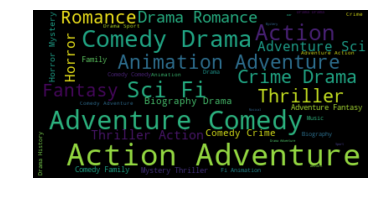

In [68]:
text = " ".join(descr for descr in movie_merge['Genre'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")